# Data Science Project

## Data Download

In [1]:
# All necessary libraries for project
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# Function to load the dataset

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    csv_path = Path("datasets/housing/housing.csv")
    
    # Check if the CSV file already exists
    if csv_path.is_file():
        print(f"Loading data from {csv_path}")
        return pd.read_csv(csv_path)
    
    # If the CSV file doesn't exist, download and extract the data
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        print(f"Downloading {url}")
        urllib.request.urlretrieve(url, tarball_path)
        print("Download complete.")
    
    # Extract the .tgz file
    with tarfile.open(tarball_path) as housing_tarball:
        print("Extracting files...")
        housing_tarball.extractall(path="datasets")
        print("Extraction complete.")
    
    # Load the data after extraction
    if csv_path.is_file():
        print(f"Loading data from {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("CSV file not found.")
        return None

In [3]:
# Call data loading function
housing = load_housing_data()

Loading data from datasets\housing\housing.csv


## Exploratory Data Analysis

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


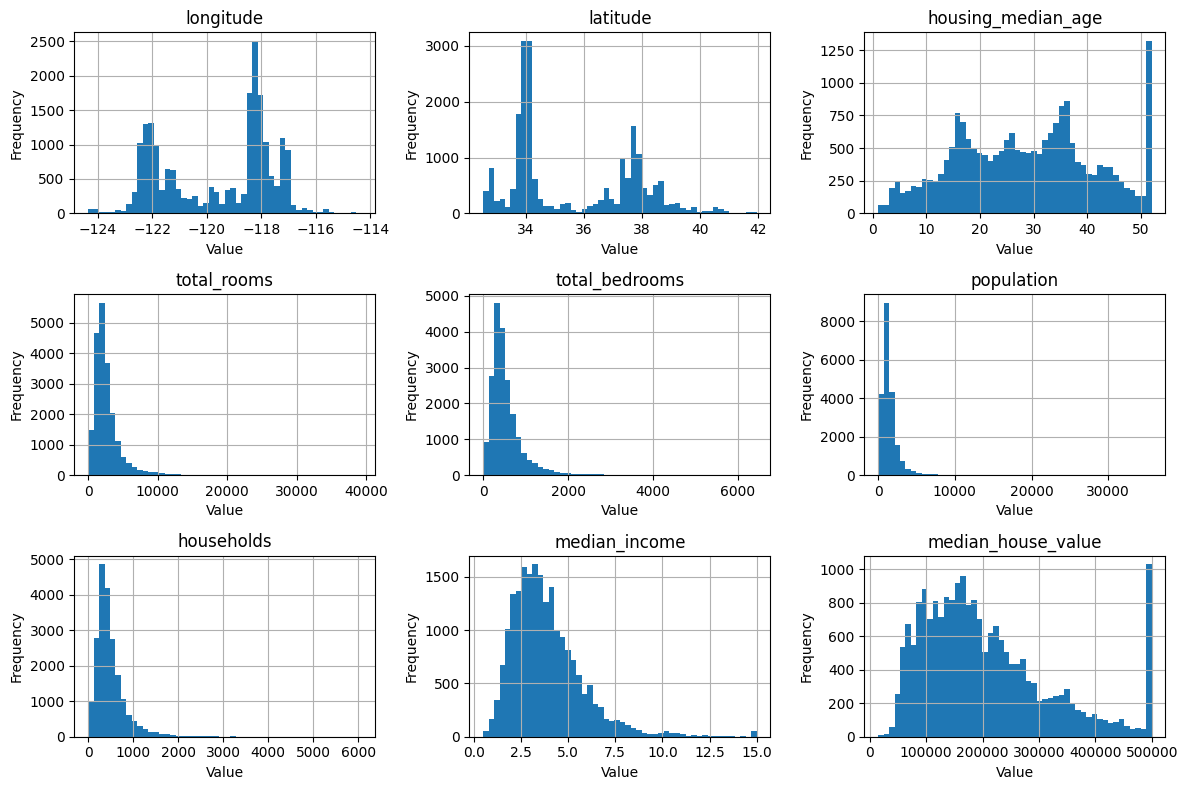

In [7]:
# Generate the histograms
housing.hist(bins=50, figsize=(12, 8))

# Add labels to each subplot
for ax in plt.gcf().axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust spacing to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# Split the dataset but first create bins and labels for the median_income column since its important in predicting the price of houses

housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

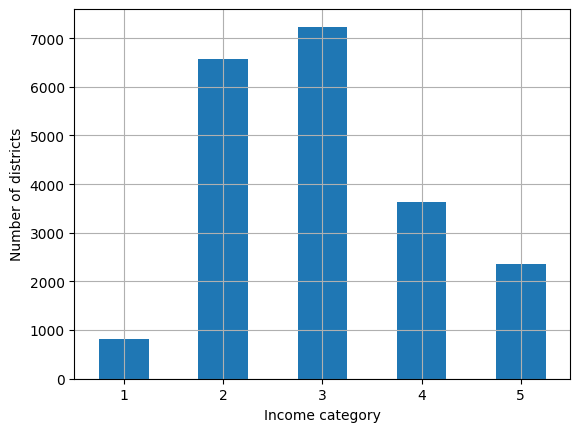

In [9]:
# Code to show newly created categories in income_cat column
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [10]:
# Actual splitting of data
strat_train_set, strat_test_set = train_test_split(
housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [11]:
housing.shape

(20640, 11)

In [12]:
# Find the percentage of each category in the test set

strat_test_set['income_cat'].value_counts()/len(strat_test_set) * 100

income_cat
3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: count, dtype: float64

In [13]:
# Let's compare this to the percentages in the full dataset to see if the split actually worked as proposed

housing['income_cat'].value_counts()/len(housing) * 100

income_cat
3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: count, dtype: float64

From the results you can deduce that both the main dataset [housing] and the test_split have almost identical percentages of income_cat distributed in them

In [14]:
# Drop income_cat columns
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [15]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY


In [16]:
# Make a copy of the training data so you can revert to it after you done with all your data explorations
housing = strat_train_set.copy()

In [17]:
housing.shape

(16512, 10)

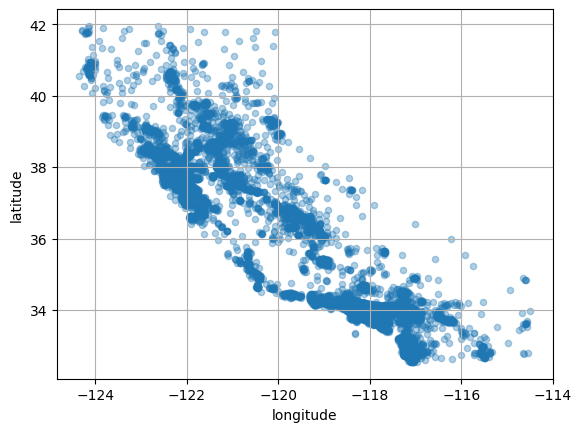

In [18]:
# Scatter plot of housing locations

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.35)
plt.show()

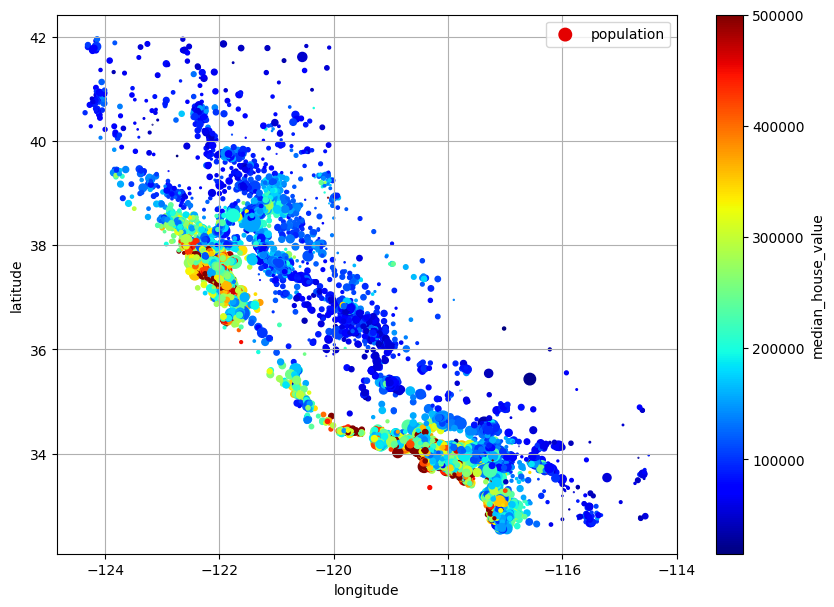

In [19]:
# Scatter plot of the prices of each house in California

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=housing["population"] / 100, label="population",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [20]:
# Drop the 'ocean_proximity' column from the DataFrame
housing_numeric = housing.drop(columns=["ocean_proximity"])

# Compute the correlation matrix
corr_matrix = housing_numeric.corr()

In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [22]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


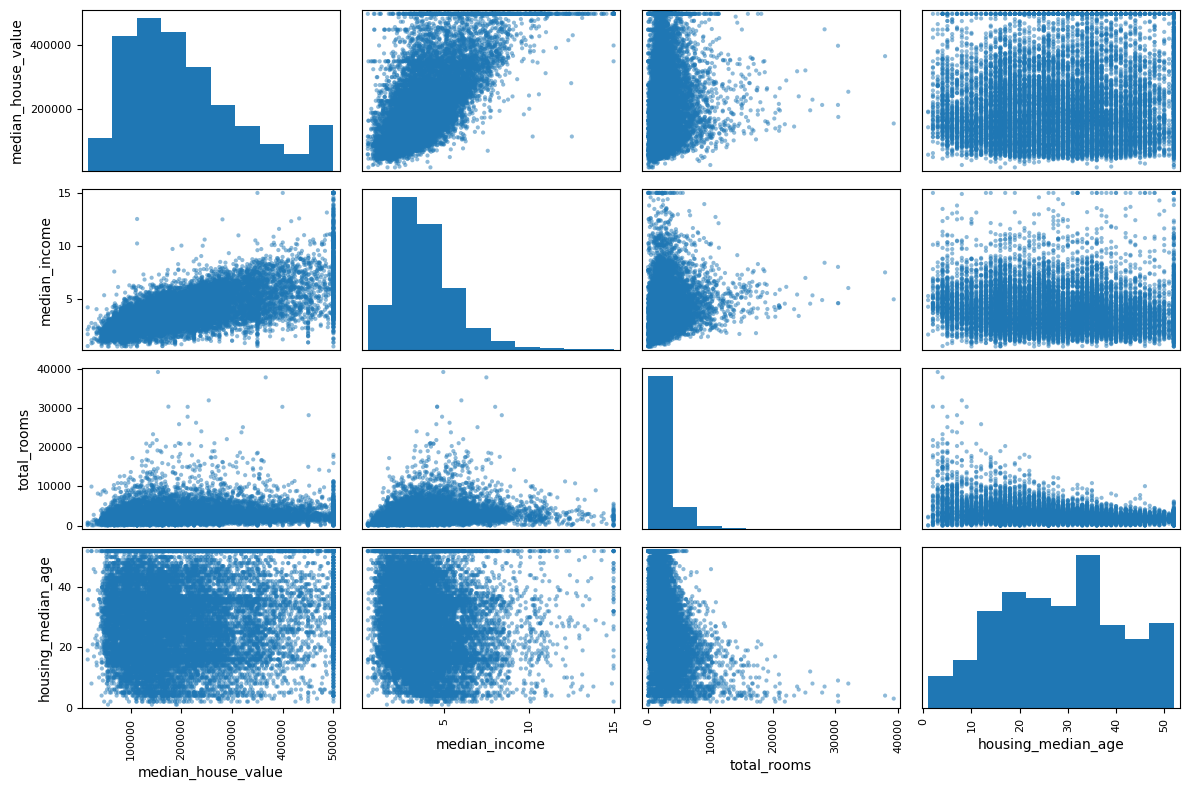

In [23]:
# Plot certain promising numerical attributes against each other
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_numeric[attributes], figsize=(12, 8))
plt.tight_layout()
plt.show()

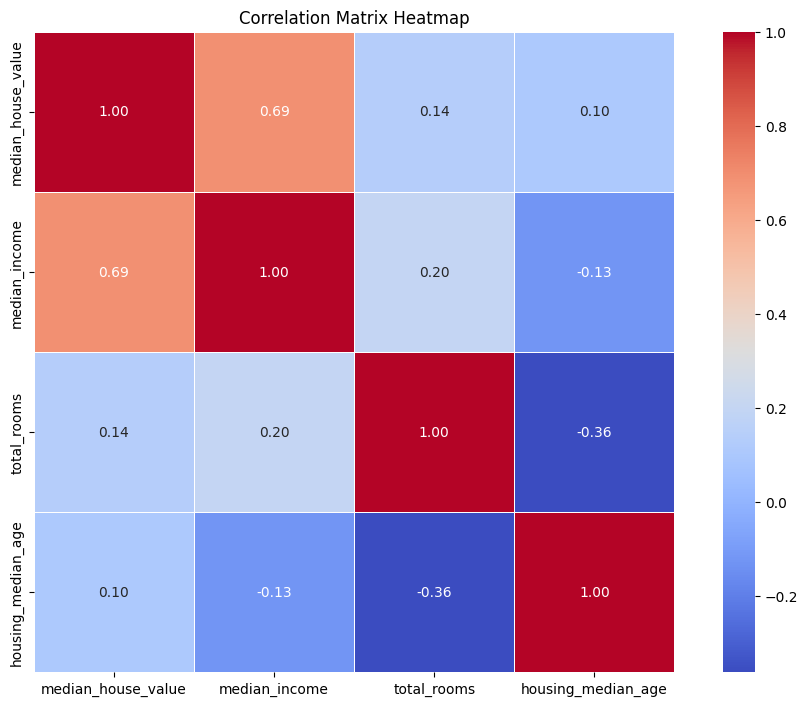

In [24]:
# Let's plot a heat map to see if its clearer

# Compute the correlation matrix
corr_matrix_a = housing_numeric[attributes].corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_a, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.tight_layout()
plt.title("Correlation Matrix Heatmap")
plt.show()

A very nice heat map is created, and from both vizzes we can say that:

It looks like the median_income column has the strongest correlation to the house_prices apart from the median_house_value itself, let's focus more on that.

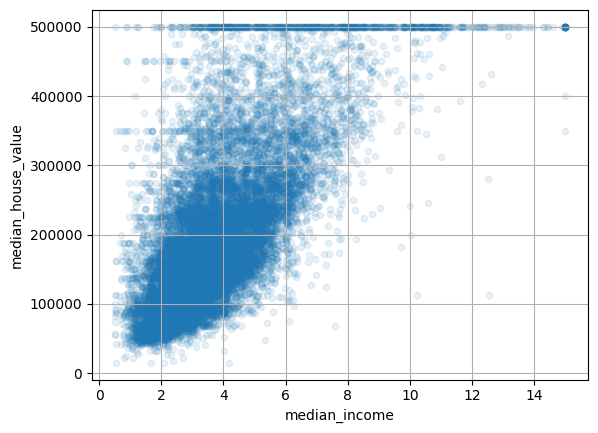

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1, grid=True)
plt.show()

## Some Feature Engineering here

In [26]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [27]:
# Let's look at the correlation of the features again after the above step
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

This shows that the bedrooms_ratio has a promising negative linear correlation with the median_house_value, also the rooms_per_house feature performed better than the households and total_rooms feature used to create it, interesting stuff.

Now we go back to a clean dataset as we're about to prepare the data for the machine learning algorithms based on all the observations we've made!

## Data Preparation for MLMs

Separate the attributes from the target variable e.g. all attributes to be used to predict a variable and then the variable to be predicted are separated

In [28]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [29]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


In [30]:
housing_labels.shape
housing_labels.head(n=5)

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

We will now select only numerical columns since this imputer only works for numerical data

### Simple Imputing - Median strategy

In [31]:
# Select only numerical columns as that's the only data type that works with such strategy
housing_num = housing.select_dtypes(include=[np.number])

In [32]:
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(housing_num)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

In [34]:
# Check if there are any missing values in housing_tr
housing_tr.isnull().values.any(axis=1)

array([False, False, False, ..., False, False, False])

In [35]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


### Handling Text and Categorical Attributes

In [36]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()


ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64

In [37]:
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [38]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [39]:
housing_cat_1hot[:8]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (8, 5)>

In [40]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
# Convert the sparse matrix to a dense 2D array and stored in a new variable
housing_cat_one_hot = housing_cat_1hot.toarray()

In [42]:
# Retrieve the column names from the encoder
column_names = cat_encoder.get_feature_names_out()

# Create the DataFrame with the column names and set the index
new_df = pd.DataFrame(housing_cat_one_hot, columns=column_names, index=housing_cat.index)

In [43]:
# Check for any null values in your newly created dataframe
new_df.isnull().any(axis=1)

13096    False
14973    False
3785     False
14689    False
20507    False
         ...  
14207    False
13105    False
19301    False
19121    False
19888    False
Length: 16512, dtype: bool

In [44]:
new_df.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0


So basically we extracted the ocean_proximity column from the dataset. It is a categorical variable with 5 categories that need to encoded with numerics representing presence or absence i.e. 1 means the particular variable it is under is present and 0 means its absent.

Then we used one of Scipy's encoders to achieve this task, the result being released as a sparse matrix array where only the 1's were stored which saves a lot of memory.

However, to convert this array back to a pandas dataframe we'll need to convert this sparse matrix into a 2D dense array (contains both the 1's and 0's, indicating presence or absence of a variable) that is able to be converted to a pd dataframe.

We also extracted the column names from the encoder and then fed into the code that converted the array to a pd dataframe.

### Feature Scaling and Transformation

Feature scaling is done to regularize the scales between the different features present within a dataset. For example population of a country and GDP are on different scales simply because the population of a country will usually be larger than the GDP which might mean the model assigns more significance to the population than the GDP when predicting, a similar scale has to be applied to all the features to make sure they carry similar weight when the prediction begins.

There are two common ways to achieve this:
1. Min-Max Scaling:
2. Standardization

However, if the particular feature you're working on has a huge tail or skew (due to outliers) you might need to do some TRANSFORMATION first to make sure the feature assumes a more normal distribution before you go ahead to do any scaling: 

A few ways to transform a feature to make it more normal is:

1. Raise it to a power i.e 2.5^3, 3^4, etc. This is also known as Polynomial Transformation.
2. Use the logarithms of the value.
3. Use the square roots of the feature values.
4. Use buckets to categorize the feature values and then only label each data point with the particular bucket it falls into. An example of this will be Quantile Transformation.

In [45]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [46]:
# Standardization - preferred method

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [47]:
sklearn.set_config(display="diagram")

## Pipelines

In [48]:
# Create a pipeline to handle the transformations required for the numerical features in your dataset

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [49]:
# Create a pipeline to handle the transformations required for the categorical features in your dataset

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

In [50]:
# Create a pipeline combining both pipelines above and then specify the data type 
# selected to avoid naming the column names and assigning it to a variable first

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
    )

In [51]:
# Now we use these pipelines to make all our work short, sweet and convenient

housing_prepared = preprocessing.fit_transform(housing)

Note that the above is returned as a Numpy array but we can get the column names using preprocessing.get_feature_names_out() and wrap the data in a nice Pandas DataFrame.

Let's get to it.

In [52]:
# Convert the NumPy array to a DataFrame with the new feature names
housing_prepared_pd = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)

In [53]:
housing_prepared_pd.head()

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0


<a id="unique-id"></a>

However, there's still quite a bit of prep to do apart from this so let's get into it:
Let’s recap what the pipeline will do and why:

1.  Missing values in numerical features will be imputed by replacing them with the median, as most ML algorithms don’t expect missing values.
2.  In categorical features, missing values will be replaced by the most frequent category.
3.  The categorical feature will be one-hot encoded, as most ML algorithms only accept numerical inputs.
4.  A few ratio features will be computed and added: bedrooms_ratio, rooms_per_house, and people_per_house. Hopefully these will better correlate with the median house value, and thereby help the ML models.
5. A few cluster similarity features will also be added. These will likely be more useful to the model than latitude and longitude.
6. Features with a long tail will be replaced by their logarithm, as most models prefer features with roughly uniform or Gaussian distributions.
7. All numerical features will be standardized, as most ML algorithms prefer when all features have roughly the same scale.

In [54]:
# Create a Cluster transformer
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    # Initialize the transformer with number of clusters, gamma for RBF kernel, and random state
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    # Fit the KMeans model to the data
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    # Transform the data to the cluster-distance space using RBF kernel
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    # Get the feature names for the transformed data
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [55]:
# Function to calculate the ratio of a first and second column
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

# Function to name the output feature of the column_ratio function
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

# Pipeline to handle ratio calculation, imputation, and scaling
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),  # Impute missing values with the median
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),  # Apply the column_ratio function
        StandardScaler())  # Standardize the features

# Pipeline to handle logarithmic transformation, imputation, and scaling
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),  # Impute missing values with the median
    FunctionTransformer(np.log, feature_names_out="one-to-one"),  # Apply logarithmic transformation
    StandardScaler())  # Standardize the features

# Cluster similarity transformer for geographical features
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)

# Default pipeline for numerical features: imputation and scaling
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

# Column transformer to apply different preprocessing pipelines to different feature subsets
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),  # Ratio of bedrooms to rooms
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),  # Ratio of rooms to households
        ("people_per_house", ratio_pipeline(), ["population", "households"]),  # Ratio of population to households
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),  # Log transformation for selected features
        ("geo", cluster_simil, ["latitude", "longitude"]),  # Cluster similarity for geographical features
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),  # Categorical features pipeline
    ],
    remainder=default_num_pipeline)  # Default pipeline for remaining numerical features (e.g., housing_median_age)


The above is done just to preprocess the data, to make sure the data missing values are handled properly as <a href="#unique-id">stated above.</a> Now we go to model selection and training 

## Select and Train a Model

### Training and Evaluating on the Training Set to Check for Over or Underfitting

#### 1. Linear Regression Model Trial

In [56]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Create a pipeline with preprocessing and Linear Regression
lin_reg = make_pipeline(preprocessing, LinearRegression())

# Fit the model to the housing data
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002063B38DC90>)])),
                ('linearregression', LinearRegression())])

Let's try the full preprocessing pipeline on a few training instances:

In [57]:
# Use the newly fitted model to predict values on the training data
housing_predictions = lin_reg.predict(housing)

# Print a few rows of predictions out
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([242800., 375900., 127500.,  99400., 324600.])

Now let's compare this to the actual values

In [58]:
# Print a few rows of the actual values out
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [59]:
# Let's calculate the ratio of errors between the two different values - predicted and actual.

error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-47.0%, -22.3%, 25.4%, 3.4%, -10.3%


As you can see it's close enough in some instances and then completely way off mark, especially in the first scenario where the difference between predicted and actual value is above 200,000 dollars. This indicates underfitting. But first let's calculate the rmse on the training data to confirm our suspicions.

In [60]:
# Import necessary libraries
from sklearn.metrics import root_mean_squared_error

# Evaluate the model
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68647.95686706704

This is better than nothing, but clearly not a great score: the median_housing_values of most districts range between $120,000 and $265,000, so a typical prediction error of $68,628 is really not very satisfying. This is an example of a model underfitting the training data.

When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are:
1. To select a more powerful model
2. To feed the training algorithm with better features, or 
3. To reduce the constraints on the model. 

This model is not regularized, which rules out the last option. You could try to add more features, but first you
want to try a more complex model to see how it does. 

#### 2. Decision Tree Regressor

In [61]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Create a pipeline containg the preprocessing and model you chose
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

# Fit the pipeline to the training data
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002063B38DC90>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [62]:
# Now we check the RMSE straight as an evaluation method on the training data
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course, it is much more likely that the model has badly overfit the data. How can you be sure?

#### Better Evaluation Using Cross-Validation
One way to evaluate the decision tree model would be to use the train_test_split() function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set. It’s a bit of effort, but nothing too difficult, and it would work fairly well.

A great alternative is to use Scikit-Learn’s k_-fold cross-validation feature. The following code randomly splits the training set into 10 non-overlapping subsets called folds, then it trains and evaluates the decision tree model 10
times, picking a different fold for evaluation every time and using the other 9 folds for training. The result is an array containing the 10 evaluation scores:


In [63]:
# Import necessary packages
from sklearn.model_selection import cross_val_score

# Calculate the tree_rmses using cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
scoring="neg_root_mean_squared_error", cv=10) 

# Scikit-Learn's cross-validation expects a utility function (higher is better) RMSE is a cost function 
# (lower is better), so it's negative in scoring. Switch the sign of the output to get the RMSE scores

In [64]:
# Let’s look at the results:

pd.Series(tree_rmses).describe()

count       10.000000
mean     67153.318273
std       1963.580924
min      63925.253106
25%      66083.277180
50%      66795.829871
75%      68074.018403
max      70664.635833
dtype: float64

Now the decision tree doesn’t look as good as it did earlier. In fact, it seems to perform almost as poorly as the linear regression model! Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). The decision tree has an RMSE of about 66,868, with a standard deviation of about 2,061. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always feasible. 

Let's try one last model:

####  Random Forest Regressor

In [65]:
# Import necessary libraries
from joblib import Memory, dump, load

# Define the caching directory to save computation time
memory = Memory(location='cache_directory', verbose=0)

In [66]:
# Import the necessary libraries - Do not run again, just load the model in the next code block.
from sklearn.ensemble import RandomForestRegressor

# Assuming preprocessing and memory are already defined
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42), memory=memory)

# Run cross-validation with parallel processing
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

# Fit the model on the entire dataset
forest_reg.fit(housing, housing_labels)

# Publish the evaluation results
pd.Series(forest_rmses).describe()

count       10.000000
mean     47002.931706
std       1048.451340
min      45667.064036
25%      46494.358345
50%      47093.173938
75%      47274.873814
max      49354.705514
dtype: float64

In [67]:
# Save the fitted model
dump(forest_reg, 'forest_reg_pipeline.joblib')

# Load the fitted pipeline
forest_reg = load('forest_reg_pipeline.joblib')

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [68]:
housing_predictions = forest_reg.predict(housing)
forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

17547.52124624957

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts. Let's fine-tune this model as it shows promise

## FineTune your model

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

You can get the full list of hyperparameters available for tuning by looking at `full_pipeline.get_params().keys()`:

In [70]:
# Shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'prepro

The best hyperparameter combination found:

In [71]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [72]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000020...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002063B356410>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

Let's look at the score of each hyperparameter combination tested during the grid search:

In [73]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43536,43753,44569,43953
13,15,8,44084,44205,44863,44384
14,15,10,44368,44496,45200,44688
7,10,6,44251,44628,45857,44912
9,10,6,44251,44628,45857,44912


### Randomized Search

In [74]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
("preprocessing", preprocessing),
("random_forest", RandomForestRegressor(random_state=42)),
])

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50), 
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000206410BF610>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002063B35FF90>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [76]:
# Displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41115,42151,42695,41987
8,32,7,41604,42200,43219,42341
0,41,16,42106,42743,43443,42764
5,42,4,41812,42925,43557,42765
2,23,8,42421,43094,43856,43124


### Analyze the Best Models and Their Errors

In [77]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [78]:
# Extract the feature names and attach it to the feature importances containing the best performing features

sorted(zip(np.round(feature_importances, 4),
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.1898, 'log__median_income'),
 (0.0771, 'cat__ocean_proximity_INLAND'),
 (0.0646, 'bedrooms__ratio'),
 (0.0569, 'rooms_per_house__ratio'),
 (0.049, 'people_per_house__ratio'),
 (0.0381, 'geo__Cluster 3 similarity'),
 (0.0256, 'geo__Cluster 22 similarity'),
 (0.0218, 'geo__Cluster 17 similarity'),
 (0.0216, 'geo__Cluster 6 similarity'),
 (0.0179, 'geo__Cluster 2 similarity'),
 (0.0174, 'geo__Cluster 32 similarity'),
 (0.016, 'geo__Cluster 18 similarity'),
 (0.0149, 'geo__Cluster 40 similarity'),
 (0.0145, 'geo__Cluster 43 similarity'),
 (0.0143, 'geo__Cluster 7 similarity'),
 (0.014, 'geo__Cluster 21 similarity'),
 (0.0138, 'geo__Cluster 38 similarity'),
 (0.0136, 'geo__Cluster 34 similarity'),
 (0.0135, 'geo__Cluster 41 similarity'),
 (0.0129, 'geo__Cluster 24 similarity'),
 (0.0126, 'geo__Cluster 10 similarity'),
 (0.0116, 'remainder__housing_median_age'),
 (0.0116, 'geo__Cluster 42 similarity'),
 (0.0115, 'geo__Cluster 30 similarity'),
 (0.0111, 'geo__Cluster 31 similarity'),
 (0.

## Evaluate Your System on the Test Set

In [79]:
# Define function to run model predictions against true test values.
def evaluate_model(model, X_test, y_test):
    try:
        final_predictions = model.predict(X_test)
        final_rmse = root_mean_squared_error(y_test, final_predictions)
        print(f"Final RMSE: {final_rmse:.3f}")
        return final_rmse
    except Exception as e:
        print(f"Error: {e}")
        return None

# Split the dataset to match the splitting in the training set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Call the function
final_rmse = evaluate_model(final_model, X_test, y_test)

Final RMSE: 41549.202


We can compute a 95% confidence interval for the test RMSE:

In [81]:
from scipy import stats

final_predictions = final_model.predict(X_test)
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39395.35475927, 43596.76969025])

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

In [ ]:
# Define a few variables
m = len(squared_errors)
mean = squared_errors.mean()

# Computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(39396.00369767951, 43596.18328117898)

## Model persistence using joblib

Save your final model

In [ ]:
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

## The END